# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

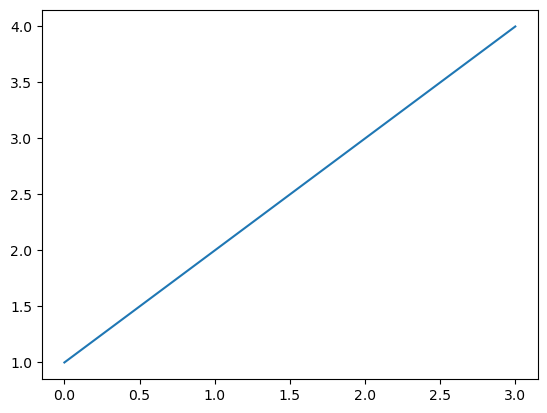

In [2]:
plt.plot([1, 2, 3, 4])
plt.show()

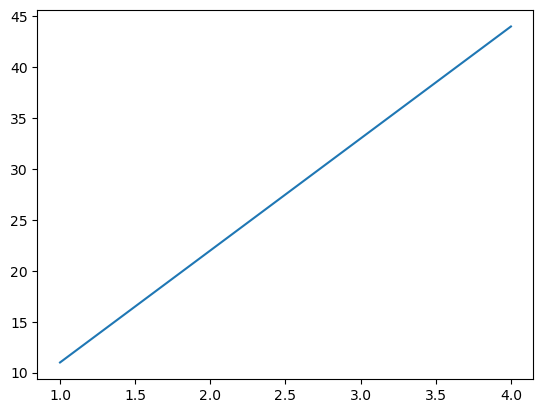

In [3]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)
plt.show()

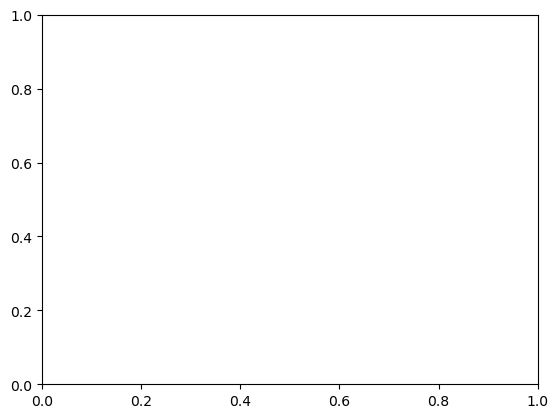

In [4]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

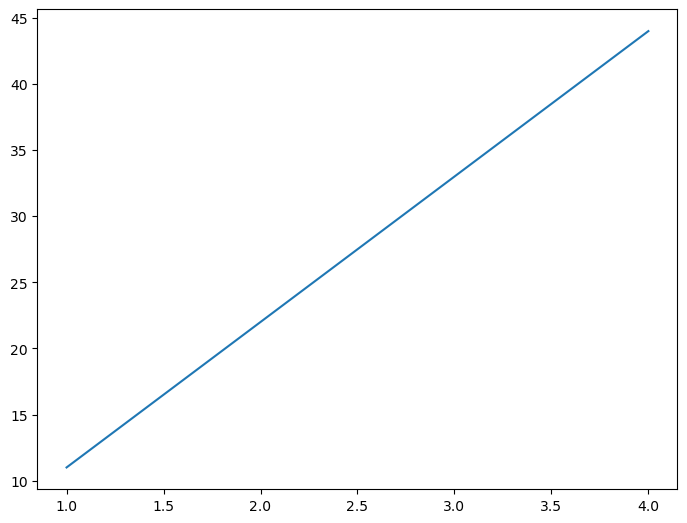

In [5]:
# 2st method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

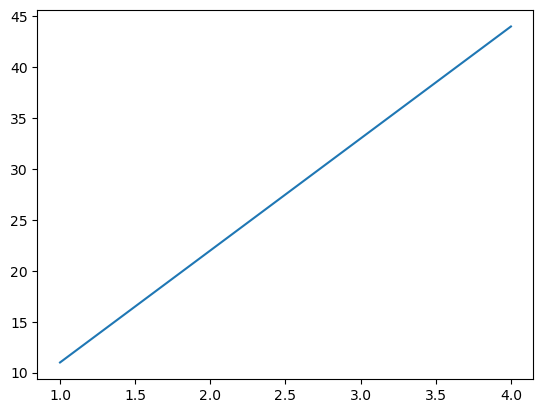

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

In [6]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y) # add some data
plt.show()
type(fig), type(ax)

### Matplotlib example workflow

In [7]:
# 0. Import matploblib and get it ready for plotting in Jupyter
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("../images/sample-plot.png")

### Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplot

In [8]:
import numpy as np

In [9]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

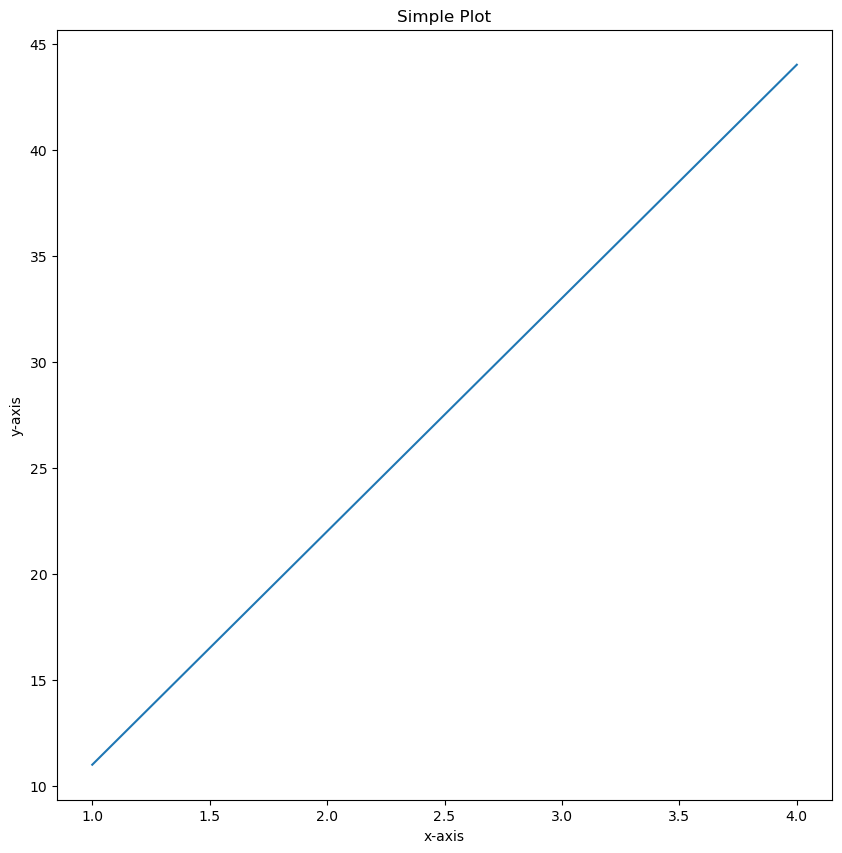

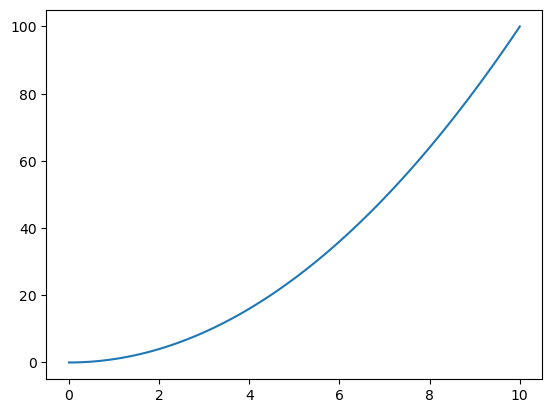

In [10]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);
plt.show()

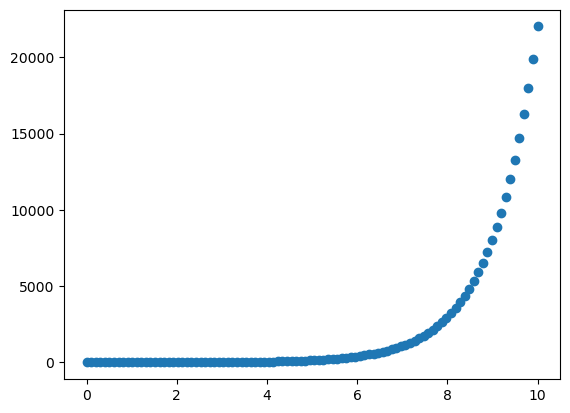

In [11]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));
plt.show()

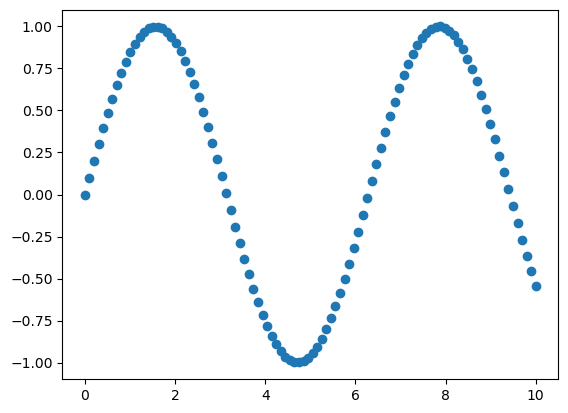

In [12]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));
plt.show()

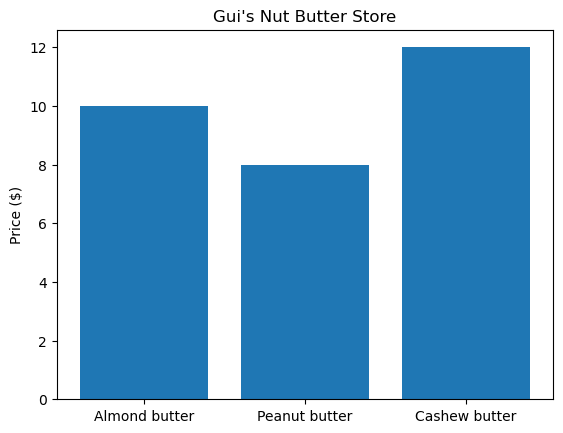

In [13]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Gui's Nut Butter Store", ylabel="Price ($)")
plt.show();

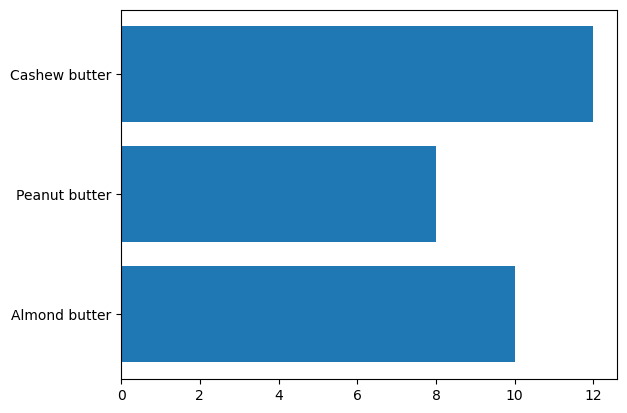

In [14]:
fig, ax = plt.subplots()
ax.barh(nut_butter_prices.keys(), nut_butter_prices.values())
plt.show();

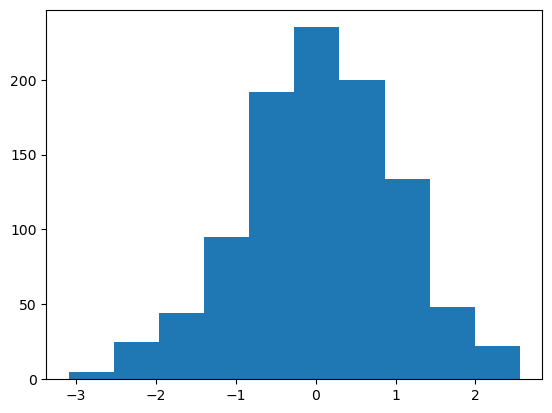

In [15]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)
plt.show();

### Two options for subplots

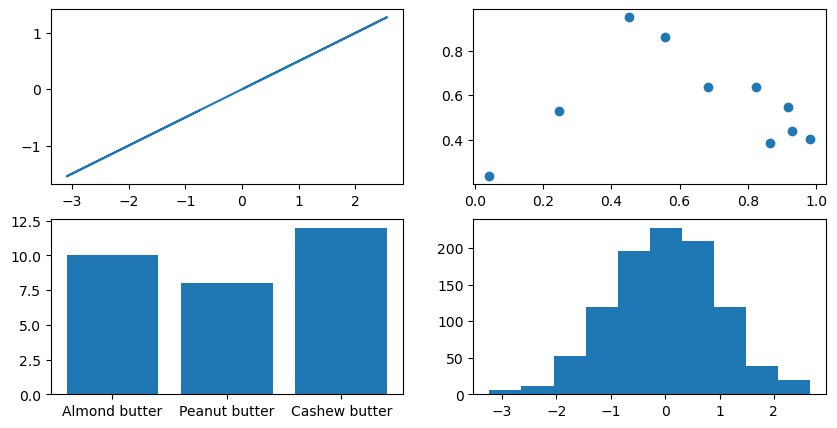

In [16]:
# Subplost option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))


# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000))

plt.show();

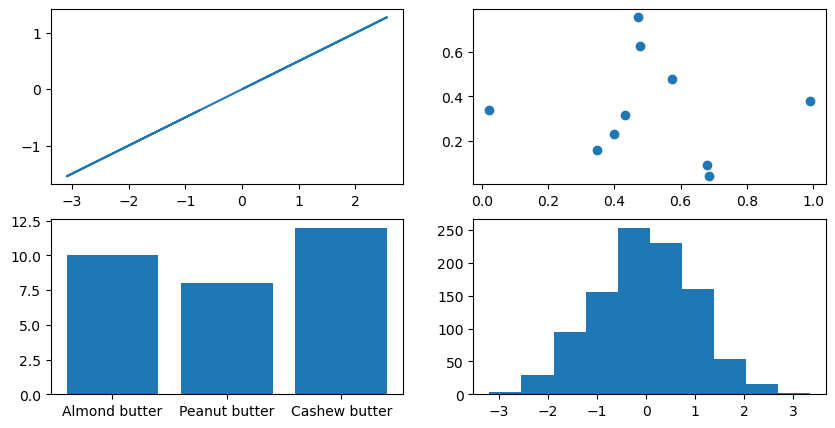

In [17]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000))

plt.show();

### Plotting from pandas DataFrames

In [18]:
import pandas as pd

In [19]:
# Make a dataframe
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


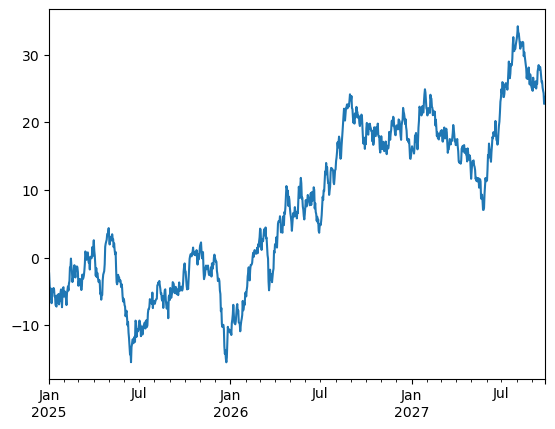

In [20]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show();

In [21]:
car_sales["Price"] = car_sales["Price"].str.replace(r'[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [22]:
type(car_sales["Price"])

pandas.core.series.Series

In [23]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sale Date"] = pd.date_range("1/1/2025", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2025-01-01
1,Honda,Red,87899,4,5000,2025-01-02
2,Toyota,Blue,32549,3,7000,2025-01-03
3,BMW,Black,11179,5,22000,2025-01-04
4,Nissan,White,213095,4,3500,2025-01-05
5,Toyota,Green,99213,4,4500,2025-01-06
6,Honda,Blue,45698,4,7500,2025-01-07
7,Honda,Blue,54738,4,7000,2025-01-08
8,Toyota,White,60000,4,6250,2025-01-09
9,Nissan,White,31600,4,9700,2025-01-10


In [25]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


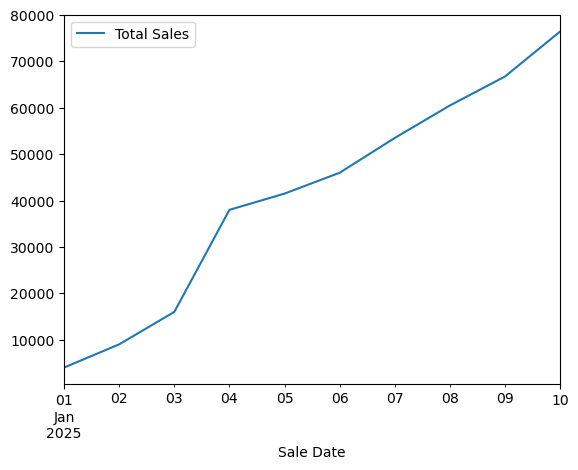

In [26]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales")
plt.show();

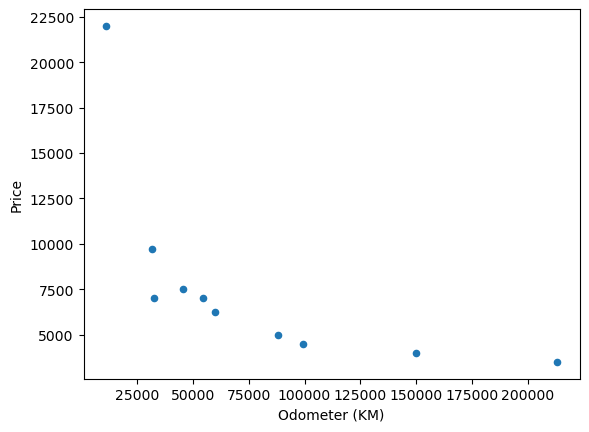

In [27]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show();

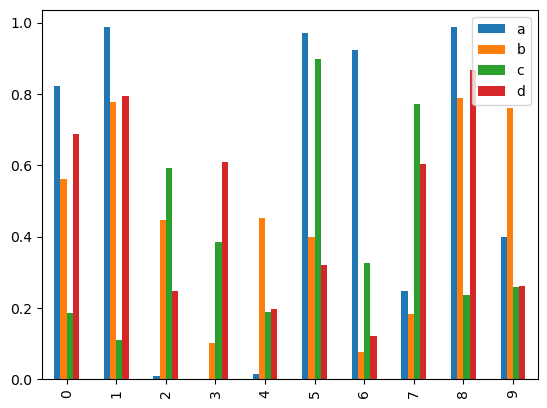

In [28]:
# Bar graph
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

# Way 1 to plot a bar graph
df.plot.bar();
plt.show()


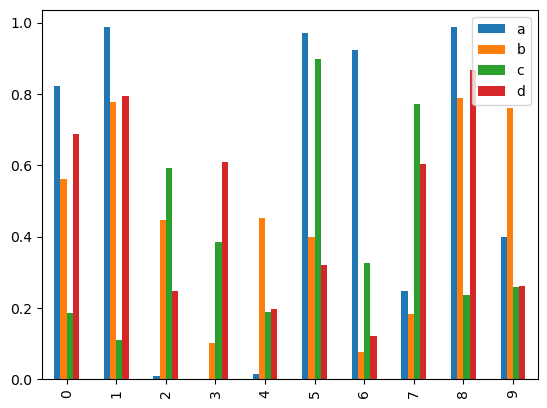

In [29]:
# Way 2 to plot a bar graph
df.plot(kind="bar")
plt.show();

In [30]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


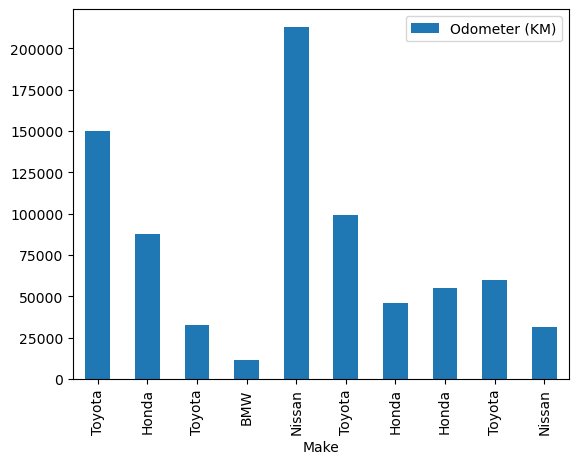

In [31]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")
plt.show();

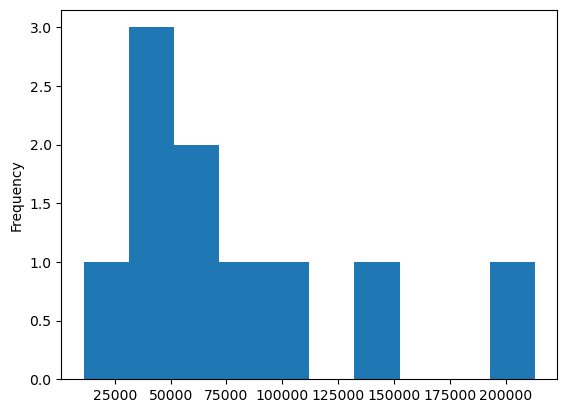

In [32]:
# Histograms

car_sales["Odometer (KM)"].plot.hist();
plt.show()

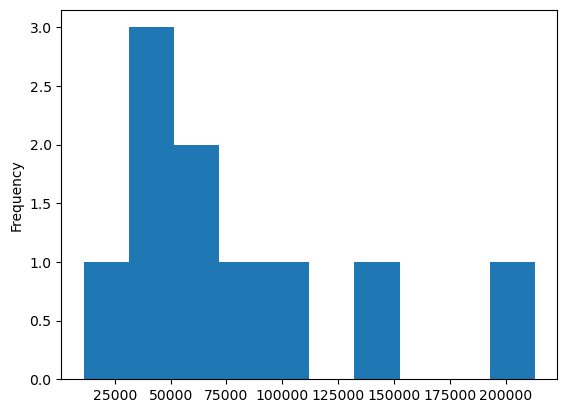

In [33]:
car_sales["Odometer (KM)"].plot(kind="hist");
plt.show()

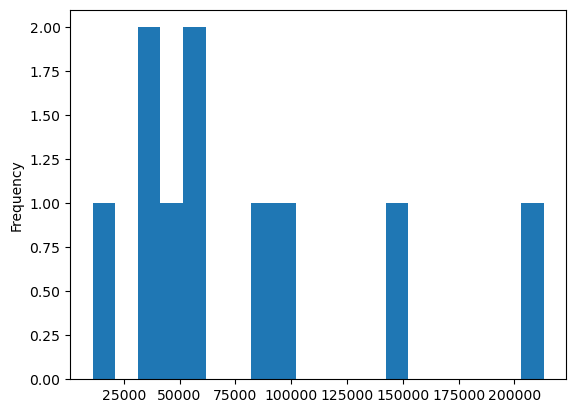

In [34]:
car_sales["Odometer (KM)"].plot.hist(bins=20)
plt.show()

In [35]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


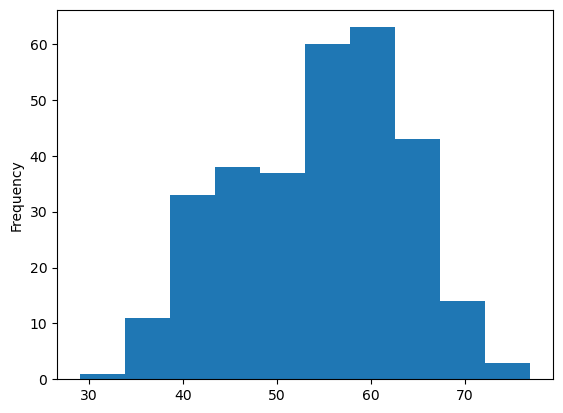

In [36]:
# Create a histogram of age
heart_disease["age"].plot.hist();
plt.show()

In [37]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


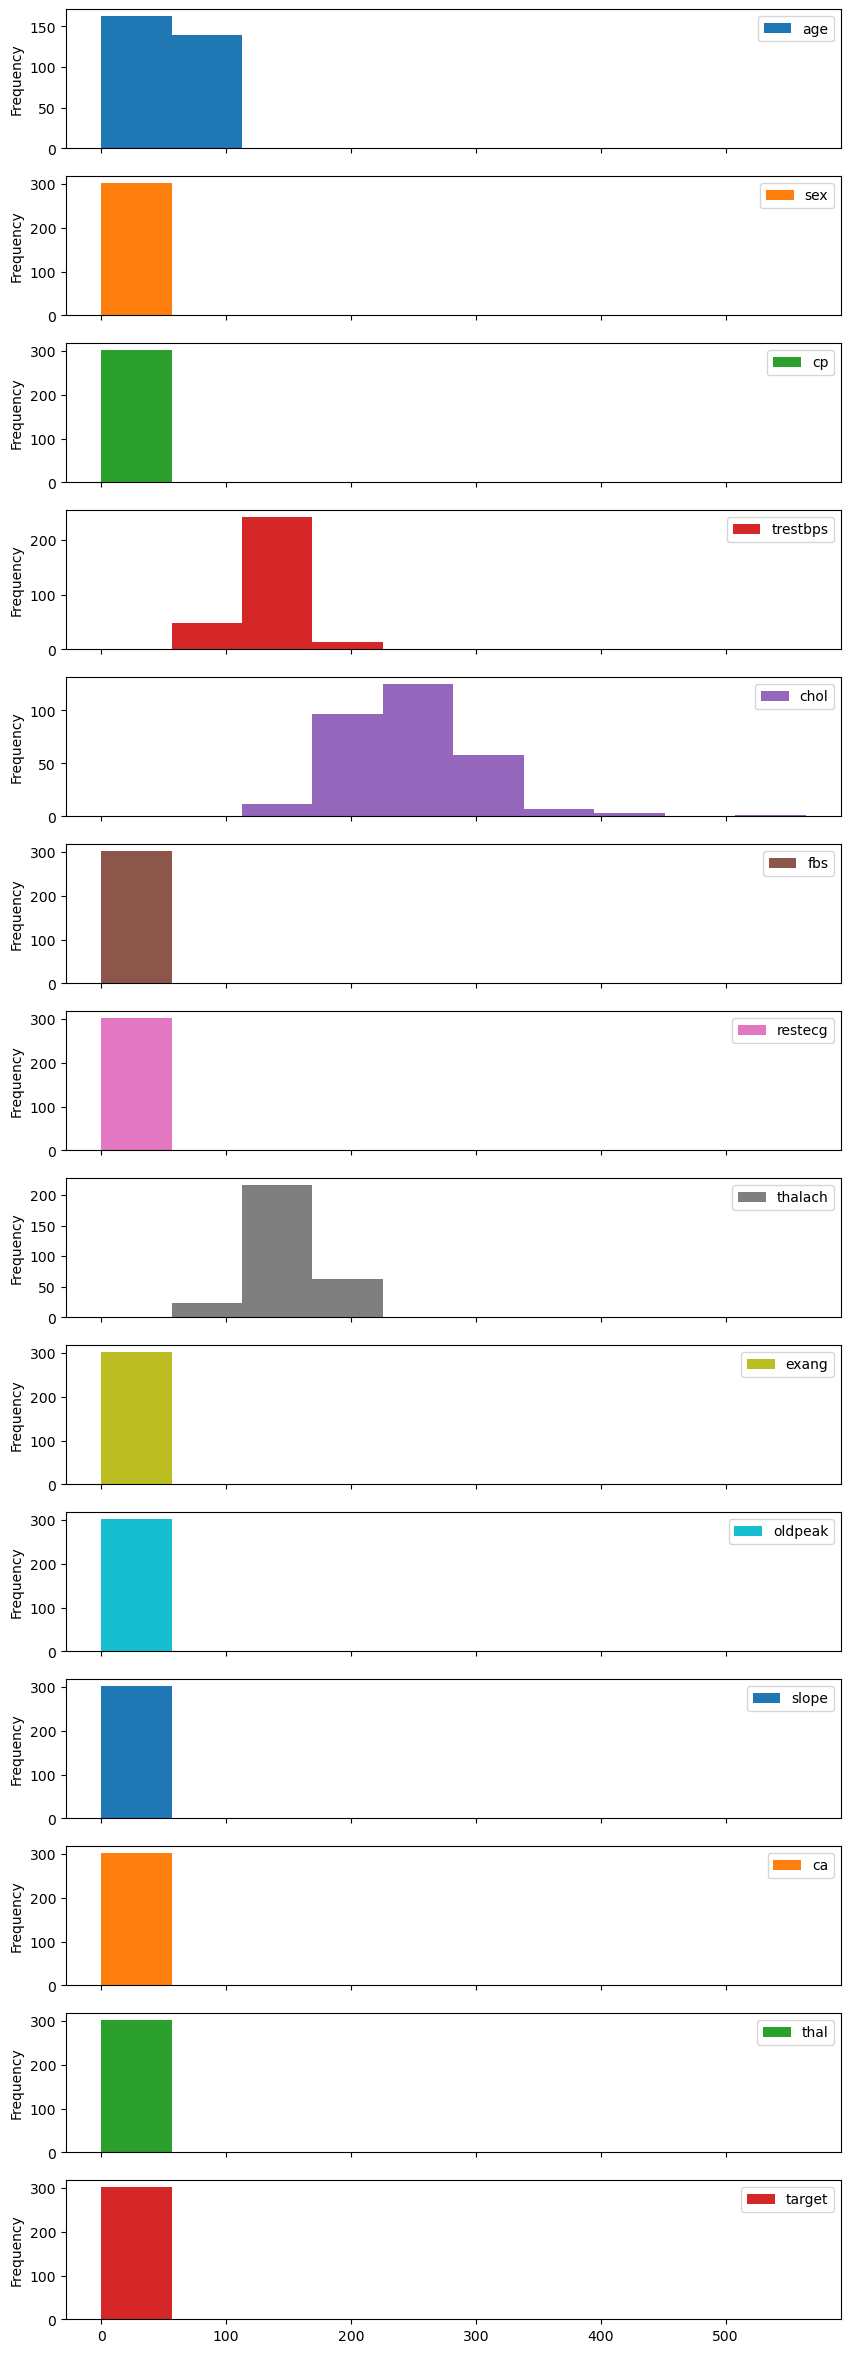

In [38]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);
plt.show()

### Wich one should you use? (PyPlot vs MatPlotLib OO method)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [39]:
over_50 = heart_disease[heart_disease["age"] > 50]

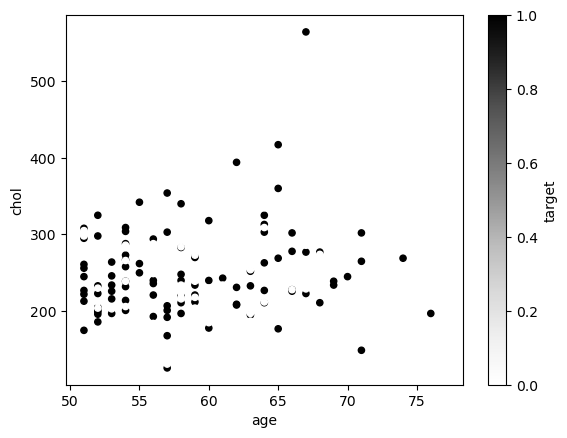

In [40]:
# Pyplot method
over_50.plot(x='age', y='chol', c='target', kind='scatter');
plt.show()

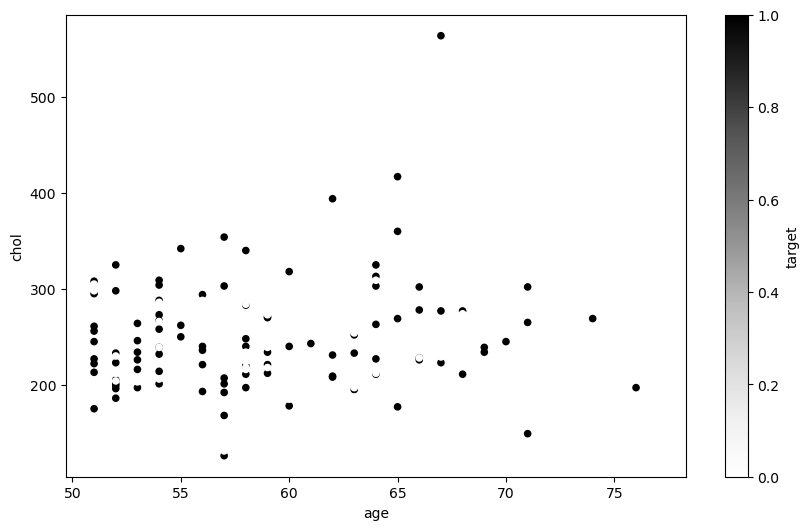

In [41]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(x='age', y='chol', c='target', kind='scatter', ax=ax);
# ax.set_xlim([45, 100])
plt.show()

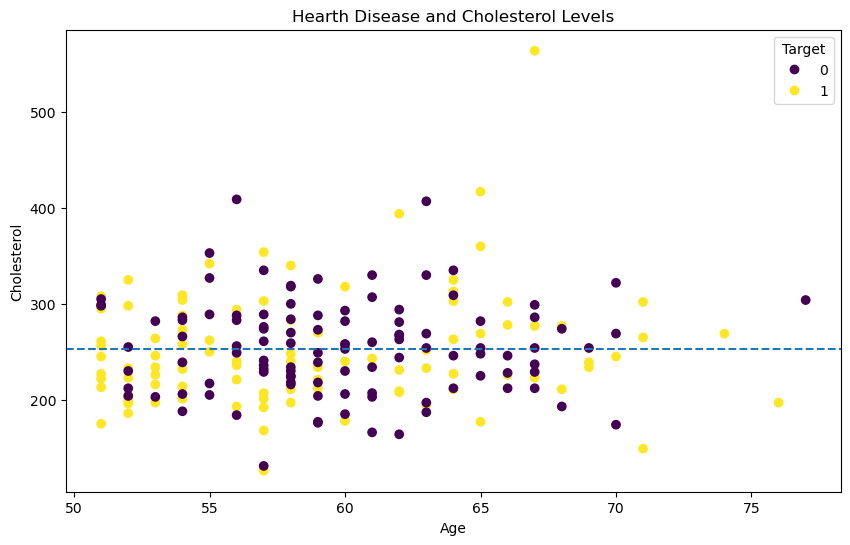

In [42]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

# Customize the plot
ax.set(title="Hearth Disease and Cholesterol Levels", xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

plt.show()

In [43]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


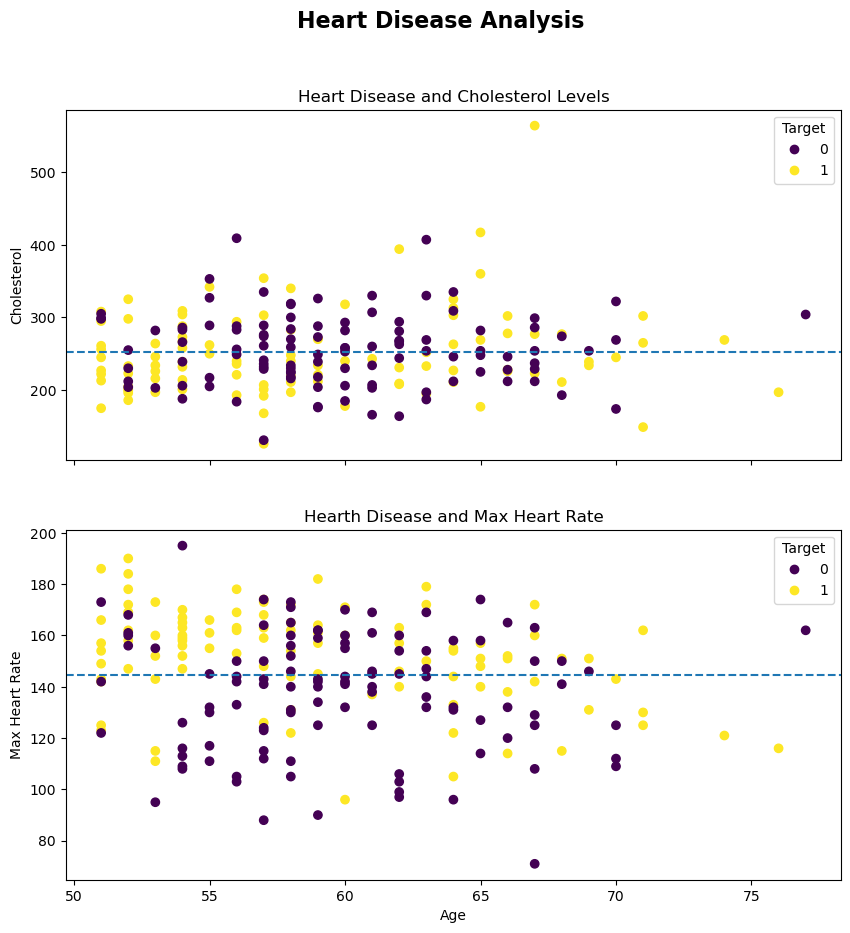

In [44]:
# Subplot of chol, age, thalach 
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True);

#### ax0 ####
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol");

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

#### ax1 ####
# Add data to ax1
scatter = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"])

# Customize ax1
ax1.set(title="Hearth Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate");

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

plt.show();

### Customizing Matplotlib plots and getting stylish

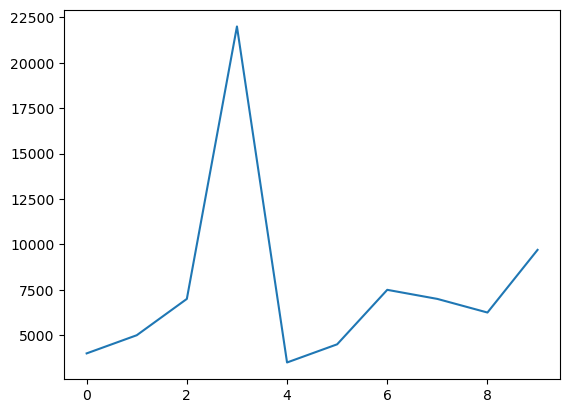

In [45]:
car_sales["Price"].plot();
plt.show()

In [46]:
plt.style.use('seaborn-v0_8-whitegrid')

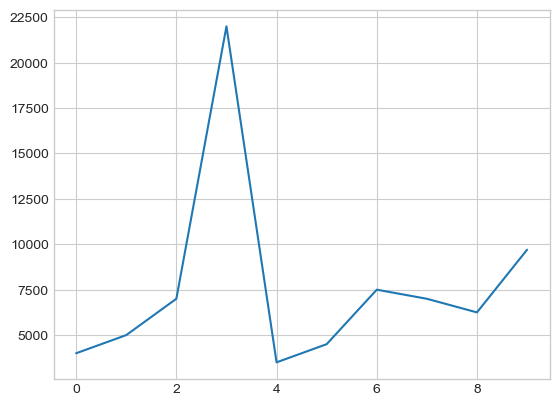

In [47]:
car_sales["Price"].plot();
plt.show()

In [48]:
plt.style.use('seaborn-v0_8')

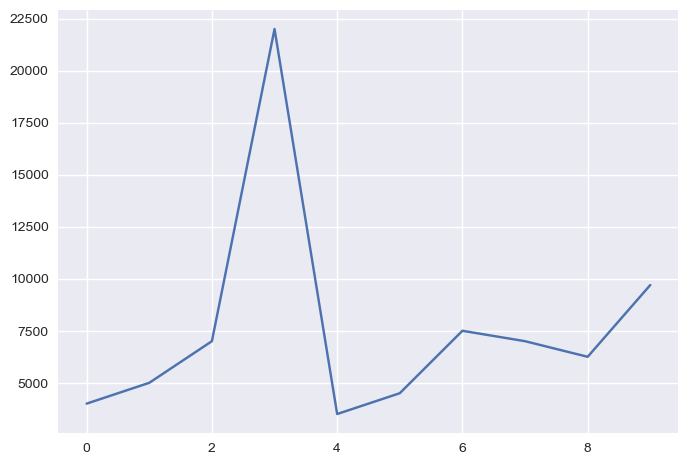

In [49]:
car_sales["Price"].plot();
plt.show()

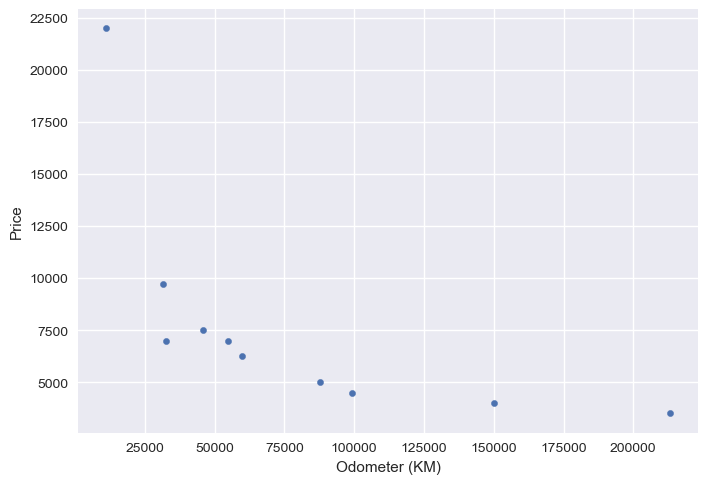

In [50]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");
plt.show()

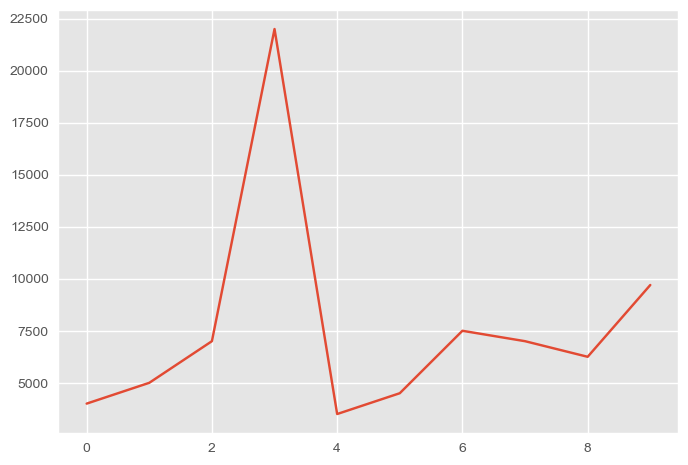

In [51]:
plt.style.use('ggplot')
car_sales["Price"].plot()
plt.show()

In [52]:
# Create some data
x = np.random.randn(10, 4)

In [53]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

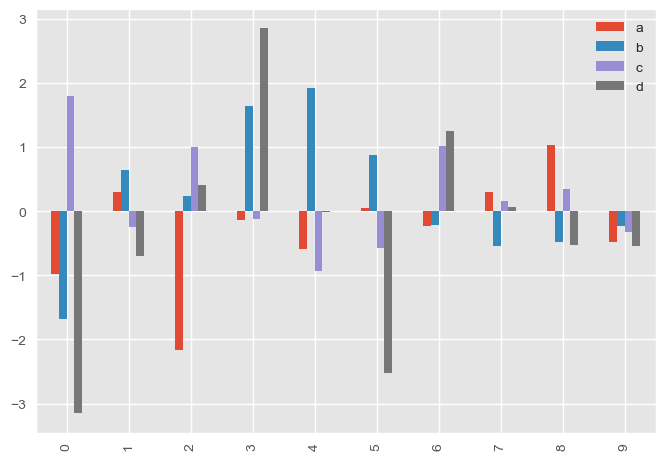

In [54]:
ax = df.plot(kind='bar');
type(ax)
plt.show()

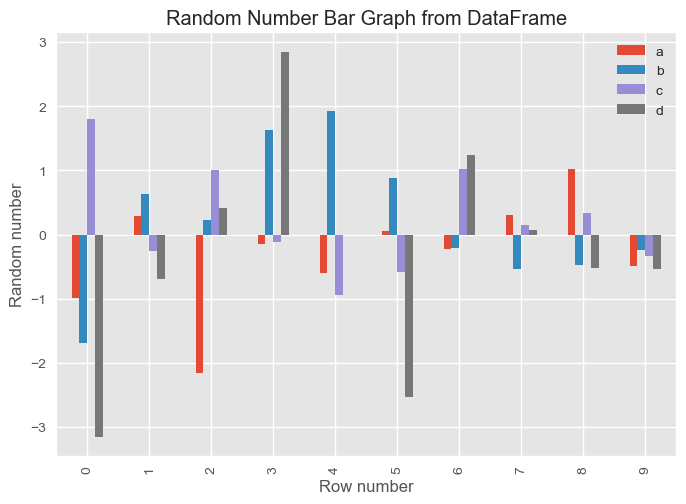

In [55]:
# Customize our plot with the set() method
ax = df.plot(kind="bar");

# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame", xlabel="Row number", ylabel="Random number")

# Make the legend visible
ax.legend().set_visible(True);
plt.show()

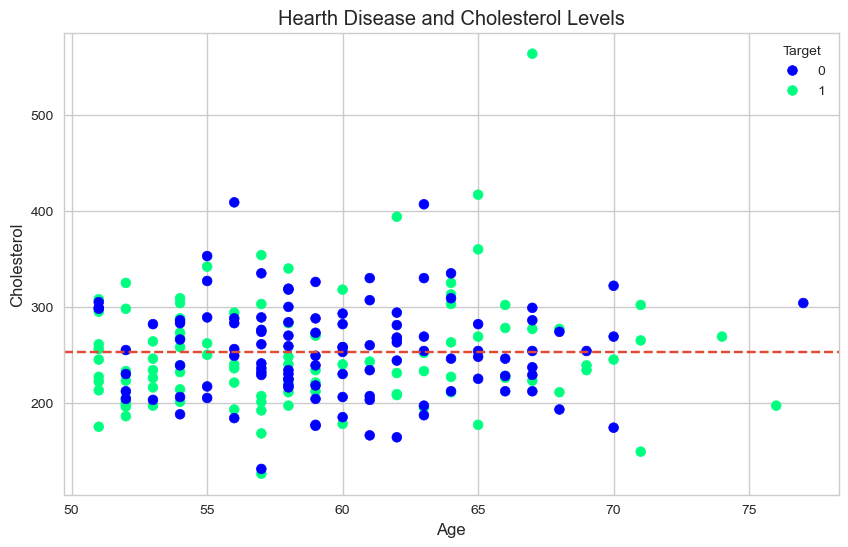

In [60]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

# Customize the plot
ax.set(title="Hearth Disease and Cholesterol Levels", xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

plt.show()

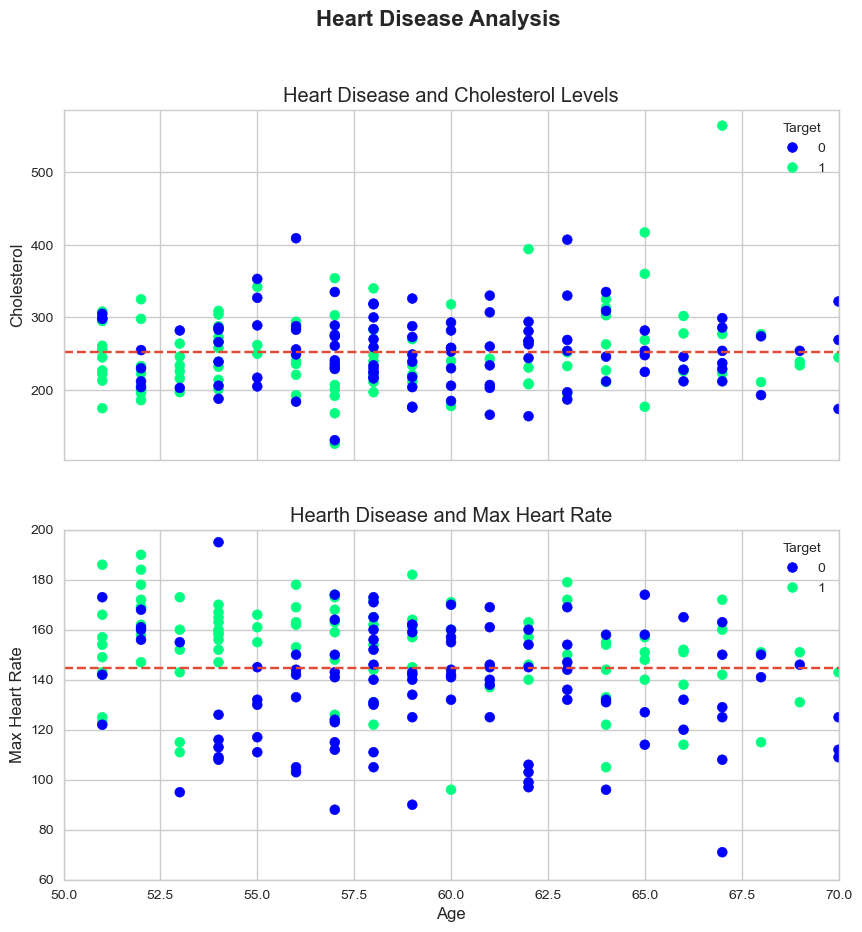

In [67]:
# Customizing the y and x axis limitations

# Subplot of chol, age, thalach 
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True);

#### ax0 ####
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol");

# Change the x axis limit
ax0.set_xlim([50, 80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

#### ax1 ####
# Add data to ax1
scatter = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="winter")

# Customize ax1
ax1.set(title="Hearth Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate");

# Change ax1 x axis limits
ax1.set_xlim([50, 70])
ax1.set_ylim([60, 200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

plt.show();